In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import os

In [2]:
def generate_adjacency_matrix(n):
    matrix = np.random.randint(0, 2, size=(n, n))
    matrix = np.triu(matrix)  
    matrix = matrix + matrix.T - np.diag(matrix.diagonal())  
    np.fill_diagonal(matrix, 0)  
    return matrix

n = 8

matrices = [generate_adjacency_matrix(np.random.randint(5, 8)) for _ in range(n)]

for i, matrix in enumerate(matrices):
    print(f"Matrix {i+1}:\n{matrix}\n")

Matrix 1:
[[0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]]

Matrix 2:
[[0 1 1 0 0 1 1]
 [1 0 0 1 1 1 0]
 [1 0 0 0 1 0 1]
 [0 1 0 0 1 0 0]
 [0 1 1 1 0 1 0]
 [1 1 0 0 1 0 1]
 [1 0 1 0 0 1 0]]

Matrix 3:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Matrix 4:
[[0 0 0 1 0 0]
 [0 0 1 0 1 1]
 [0 1 0 0 0 1]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 1 0 0 0]]

Matrix 5:
[[0 0 0 0 0 1]
 [0 0 1 1 1 0]
 [0 1 0 1 1 1]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [1 0 1 0 1 0]]

Matrix 6:
[[0 0 0 1 0 0]
 [0 0 1 0 0 1]
 [0 1 0 0 0 0]
 [1 0 0 0 1 1]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]]

Matrix 7:
[[0 1 0 0 1 1]
 [1 0 1 0 1 1]
 [0 1 0 1 1 1]
 [0 0 1 0 1 1]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]]

Matrix 8:
[[0 1 0 0 0]
 [1 0 1 1 0]
 [0 1 0 1 1]
 [0 1 1 0 0]
 [0 0 1 0 0]]



In [3]:
def plot_graphs_from_adjacency_list(adjacency_matrices, layout='spring', figsize=(6, 4)):
    for i, adj_matrix in enumerate(adjacency_matrices):
        G = nx.from_numpy_array(adj_matrix)

        if layout == 'spring':
            pos = nx.spring_layout(G)
        elif layout == 'circular':
            pos = nx.circular_layout(G)
        elif layout == 'spectral':
            pos = nx.spectral_layout(G)
        elif layout == 'kamada_kawai':
            pos = nx.kamada_kawai_layout(G)
        else:
            raise ValueError(f"Layout desconocido: {layout}")
        
        # Graficar
        plt.figure(figsize=figsize)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
        plt.title(f"Grafo {i+1}")
        plt.show()

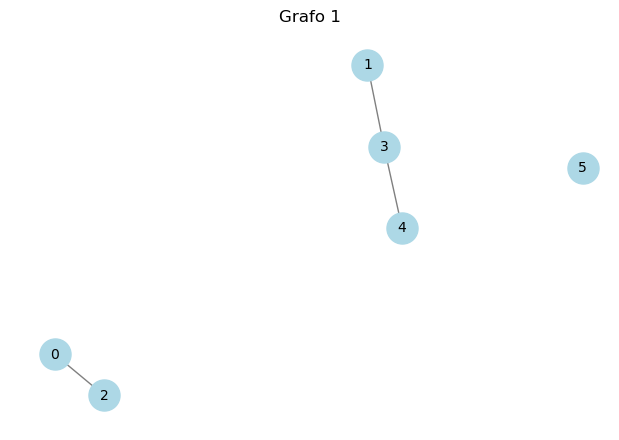

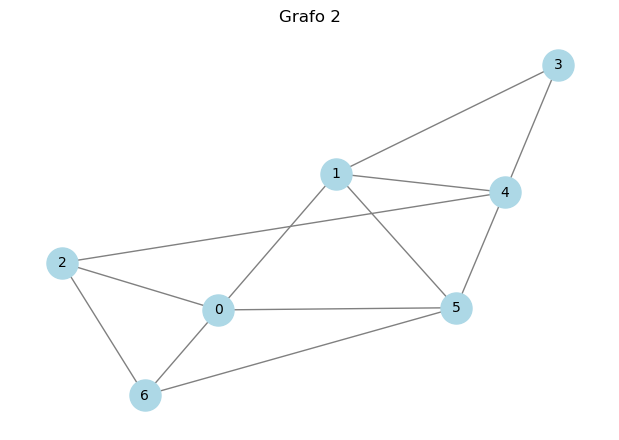

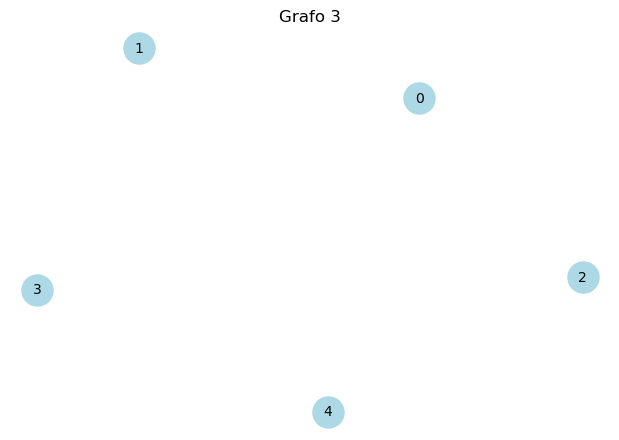

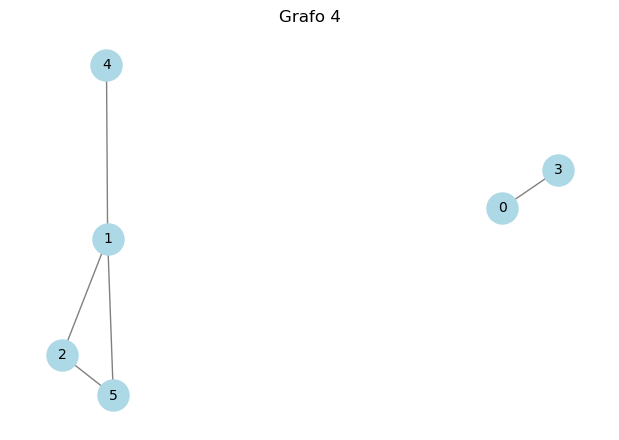

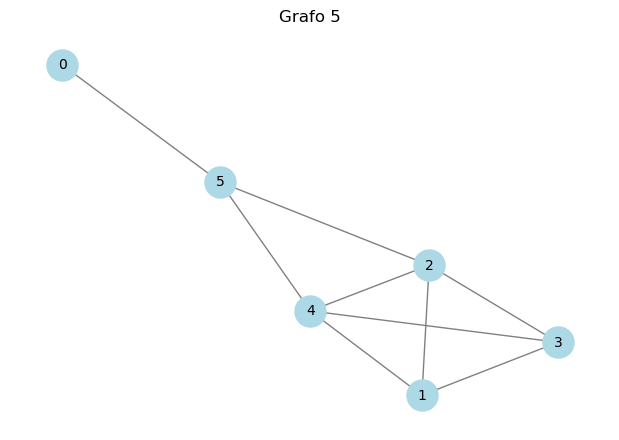

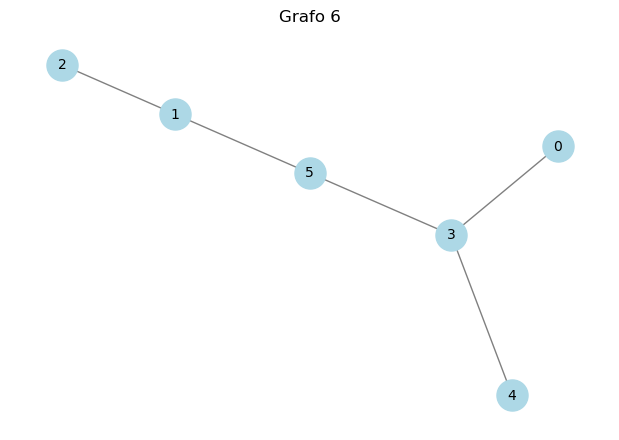

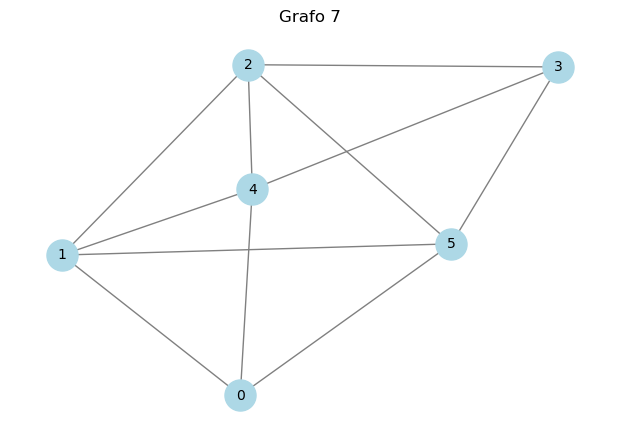

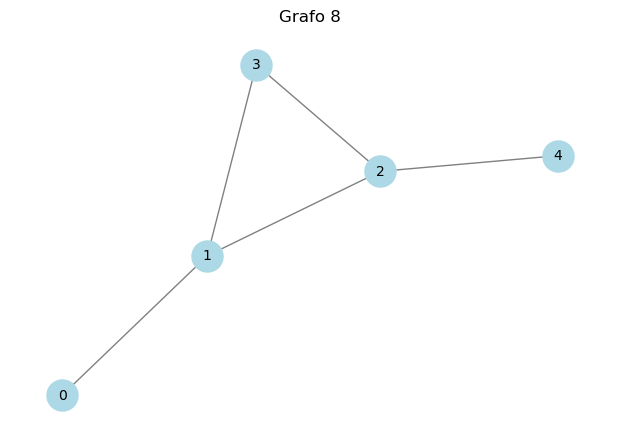

In [4]:
plot_graphs_from_adjacency_list(matrices)

In [5]:
def floyd_warshall(matrix):
    n = len(matrix)
    dist = np.copy(matrix)
    dist = np.float64(dist)
    dist[dist == 0] = np.inf
    np.fill_diagonal(dist, 0)

    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i, j] = min(dist[i, j], dist[i, k] + dist[k, j])
    
    return dist


distances = []
print("Distancias entre nodos:\n")
for i, matrix in enumerate(matrices):
    distances.append(floyd_warshall(matrix))
    print(f"Matrix {i+1}:\n{distances[-1]}\n")

Distancias entre nodos:

Matrix 1:
[[ 0. inf  1. inf inf inf]
 [inf  0. inf  1.  2. inf]
 [ 1. inf  0. inf inf inf]
 [inf  1. inf  0.  1. inf]
 [inf  2. inf  1.  0. inf]
 [inf inf inf inf inf  0.]]

Matrix 2:
[[0. 1. 1. 2. 2. 1. 1.]
 [1. 0. 2. 1. 1. 1. 2.]
 [1. 2. 0. 2. 1. 2. 1.]
 [2. 1. 2. 0. 1. 2. 3.]
 [2. 1. 1. 1. 0. 1. 2.]
 [1. 1. 2. 2. 1. 0. 1.]
 [1. 2. 1. 3. 2. 1. 0.]]

Matrix 3:
[[ 0. inf inf inf inf]
 [inf  0. inf inf inf]
 [inf inf  0. inf inf]
 [inf inf inf  0. inf]
 [inf inf inf inf  0.]]

Matrix 4:
[[ 0. inf inf  1. inf inf]
 [inf  0.  1. inf  1.  1.]
 [inf  1.  0. inf  2.  1.]
 [ 1. inf inf  0. inf inf]
 [inf  1.  2. inf  0.  2.]
 [inf  1.  1. inf  2.  0.]]

Matrix 5:
[[0. 3. 2. 3. 2. 1.]
 [3. 0. 1. 1. 1. 2.]
 [2. 1. 0. 1. 1. 1.]
 [3. 1. 1. 0. 1. 2.]
 [2. 1. 1. 1. 0. 1.]
 [1. 2. 1. 2. 1. 0.]]

Matrix 6:
[[0. 3. 4. 1. 2. 2.]
 [3. 0. 1. 2. 3. 1.]
 [4. 1. 0. 3. 4. 2.]
 [1. 2. 3. 0. 1. 1.]
 [2. 3. 4. 1. 0. 2.]
 [2. 1. 2. 1. 2. 0.]]

Matrix 7:
[[0. 1. 2. 2. 1. 1.]
 [1. 0. 1. 2.

In [6]:
def dirac_delta(x, y):
    return 1 if x == y else 0

def gaussian(x, y, sigma = 5):
    return np.exp(-np.abs(x - y) / (2 * sigma**2))

In [7]:
def shortest_path_kernel(distances1, distances2, kernel1, kernel2):
    K = 0
    n = len(distances1)
    m = len(distances2)
    for i in range(n):
        for j in range(i, n):
            for ii in range(m):
                for jj in range(ii, m):
                    if distances1[i, j] == np.inf or distances2[ii, jj] == np.inf:
                        continue
                    K += kernel1(distances1[i, j], distances2[ii, jj]) * kernel2(i, ii) * kernel2(j, jj)
    return K

In [8]:
def gram_matrix(distances):
    n = len(distances)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            K[i, j] = shortest_path_kernel(distances[i], distances[j], gaussian, dirac_delta)
            K[j, i] = K[i, j]
    return K

In [9]:
K = gram_matrix(distances)

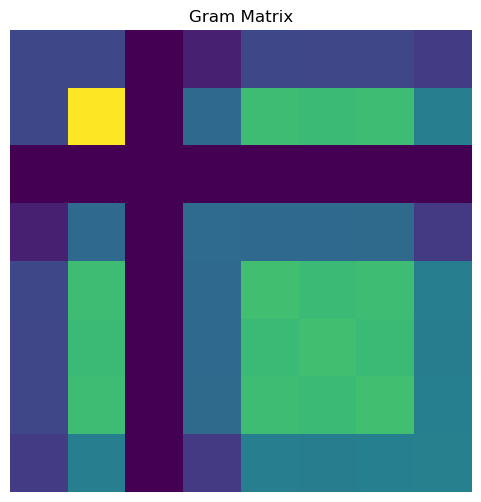

In [10]:
plt.figure(figsize=(6, 6))
plt.imshow(K, cmap='viridis')
plt.title('Gram Matrix')
plt.axis('off')
plt.show()

In [11]:
def plot_heatmap(matrix, title, labels, with_values = False, save = False, directory = None):
    plt.figure(figsize=(10, 8))
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    if matrix.shape[1] > 31:
        plt.xticks(np.arange(0, matrix.shape[1], 2), labels[::2], rotation=90)
        plt.yticks(np.arange(0, matrix.shape[0], 2), labels[::2])
    else:
        plt.xticks(np.arange(matrix.shape[1]), labels, rotation=90)
        plt.yticks(np.arange(matrix.shape[0]), labels)
    #plt.xticks(np.arange(matrix.shape[1]), labels, rotation=90)
    #plt.yticks(np.arange(matrix.shape[0]), labels)
    plt.xticks(np.arange(matrix.shape[1]))
    plt.yticks(np.arange(matrix.shape[0]))
    if with_values:
        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                plt.text(j, i, f'{matrix[i, j]:.1f}', ha='center', va='center', color='white')
    plt.tight_layout()
    if save:
        os.makedirs(directory, exist_ok=True)
        plt.savefig(os.path.join(directory, title + '.pdf'), bbox_inches='tight')
    else:
        plt.title(title)
        plt.show()
    plt.close()

In [12]:
K2 = np.load('K_F_new.npy')

In [13]:
dates1 = [f'2019-01-{i+1:02d}' for i in range(31)] + [f'2019-02-{i+1:02d}' for i in range(28)] + [f'2019-03-{i+1:02d}' for i in range(31)] + [f'2019-04-{i+1:02d}' for i in range(30)]

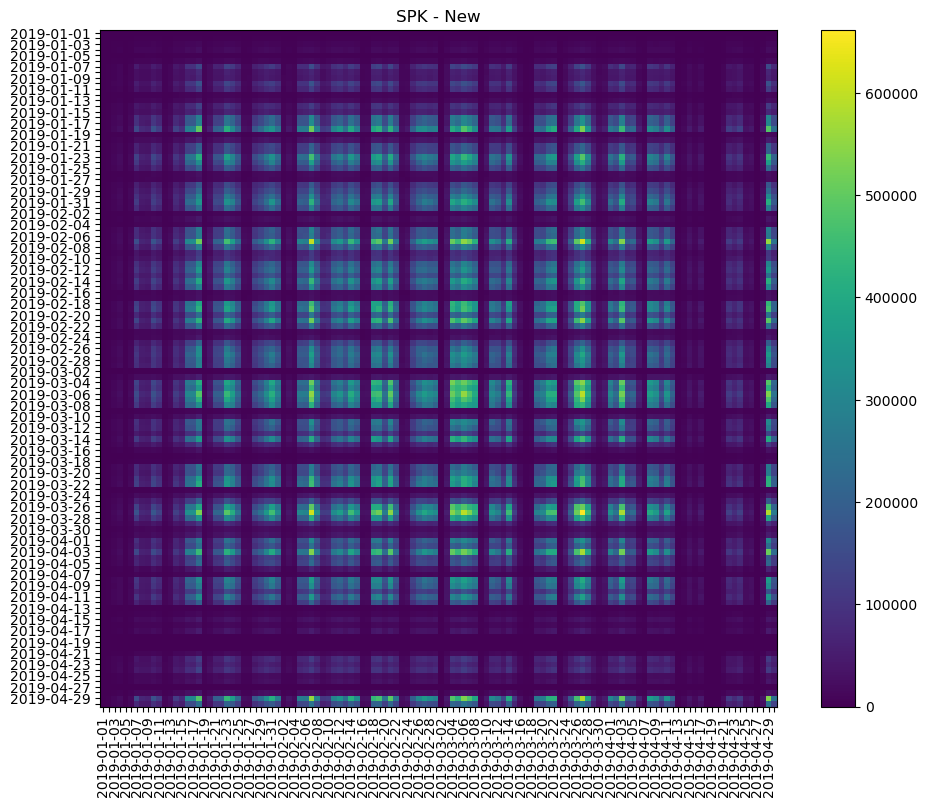

In [14]:
plot_heatmap(K2, 'SPK - New', dates1)

In [15]:
K_F_prev = np.load('spk_matrix/K_F_gauss.npy')

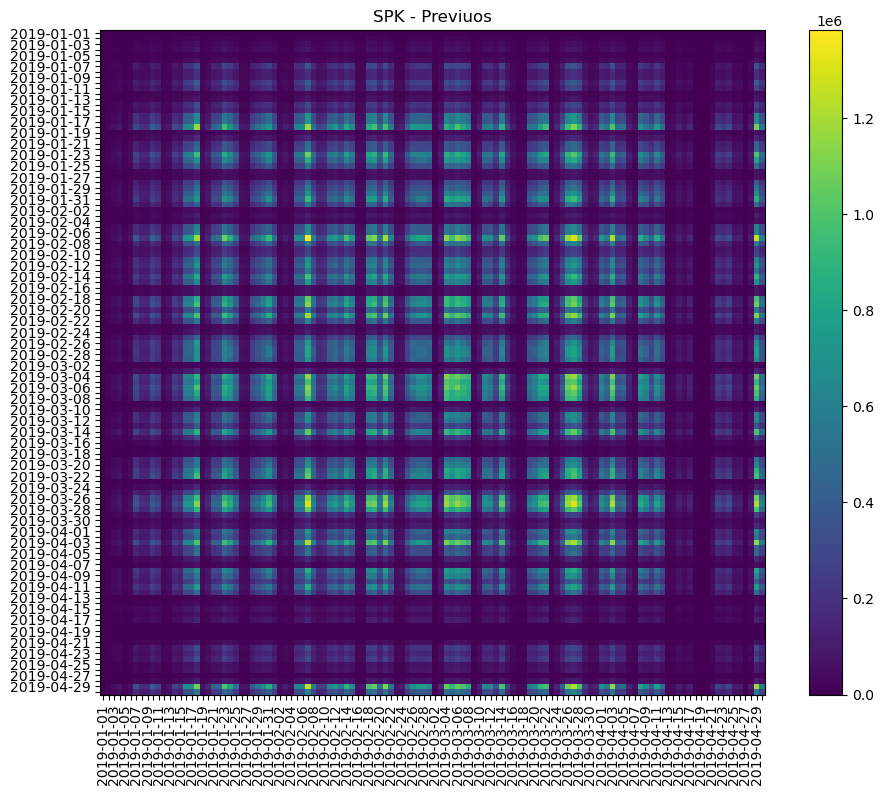

In [16]:
plot_heatmap(K_F_prev, 'SPK - Previuos', dates1)

In [17]:
K_full = np.load('K_full.npy')
dates = [f'2019-03-{i:02d}' for i in range(1, 31)]

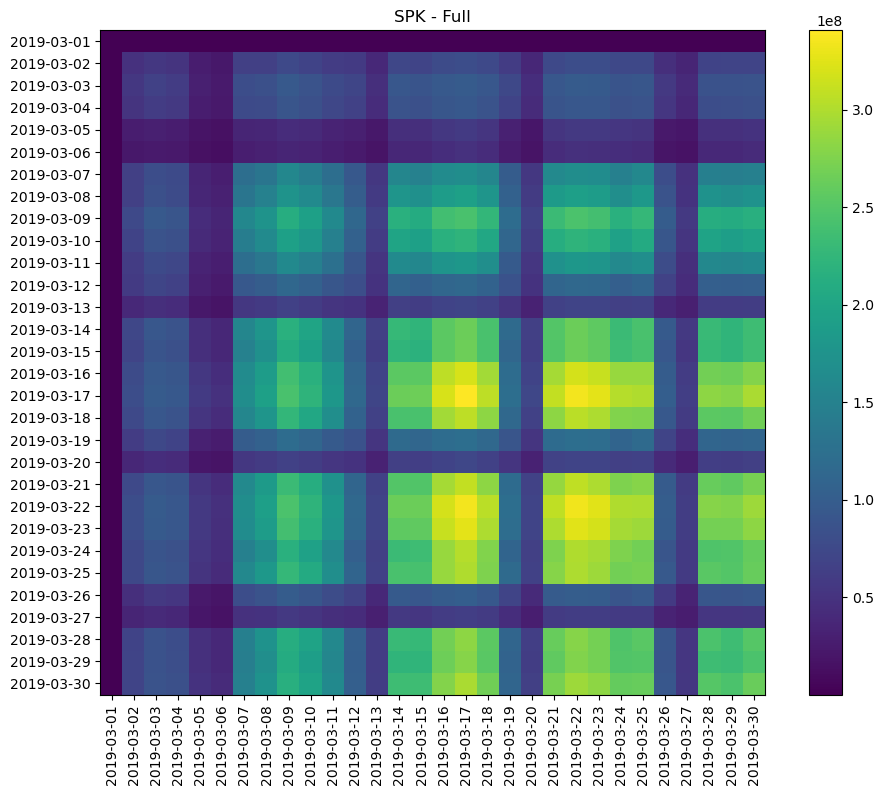

In [18]:
plot_heatmap(K_full, 'SPK - Full', dates)